# Abstract

In this project, I trained a machine learning model to predict home loan approval using a dataset of applicant information. The dataset included features such as:
- **income**
- **marital status**
- **education level**
- **property area**
- **co-applicant income**
- **credit history**
- **loan amount**

Accuracy - 88%

590 rows, 11 features

# Home Loan Approval Prediction

## Problem Statement

Financial institutions face challenges in accurately and efficiently assessing loan applications due to the variability of applicants' profiles, including factors such as income, employment status, credit history, and dependents. The manual assessment process is often time-consuming and prone to errors. A predictive machine learning model can help streamline loan approval by predicting the likelihood of loan sanctioning based on applicant details, allowing institutions to make faster and more informed decisions.

## Previous Work

Loan approval prediction has been an area of interest for financial analysts and data scientists for several years. Many machine learning algorithms, including Logistic Regression, Decision Trees, and Random Forests, have been applied to various datasets to predict loan approvals. These models often rely on features such as **income**, **marital status**, **education level**, **property area**, **credit history**, and **loan amount**. Previous studies have demonstrated that **credit history** and **applicant income** are among the most significant factors in predicting loan approval.

However, many models suffer from overfitting, improper handling of missing data, and poor performance on skewed data. The use of ensemble methods, like Random Forests, has shown promise in addressing these challenges by reducing overfitting and improving accuracy.

[reference](https://www.kaggle.com/code/unmoved/classify-home-loan-approval)

## Objectives

1. **Enhance Model Performance**
   - Fine-tune the layers of the model for better adaptation to the dataset.

2. **Optimize Training Process**
   - Monitor early stopping rates using visualization to decrease validation loss and prevent overfitting.

3. **Evaluate Model Performance**
   - Utilize metrics like precision, recall, and F1-score, along with confusion matrix visualizations, to assess various model effectiveness.

4. **Deploy and come up with the ways use the model**

## Methodology

The development of the home loan approval prediction model followed a structured and systematic approach, leveraging a publicly available dataset from Kaggle. The steps involved are outlined below:

### 1. Data Understanding
- The dataset was sourced from Kaggle, containing details about loan applicants, such as **income**, **education level**, **marital status**, **property area**, **loan amount**, and **credit history**.
- An initial exploration of the data was performed using `df.head()` to understand its structure, identify categorical and numerical variables, and detect any missing or inconsistent values.

### 2. Data Preprocessing
- **Categorical Encoding**: 
  - Categorical variables such as `Education`, `Property_Area`, `Gender`, and `Married` were converted into numerical values. For instance, `Graduate` and `Not Graduate` were mapped to 1 and 0, respectively.
  - Binary categorical values (e.g., `Loan_Status`, `Self_Employed`) were also encoded into 1 and 0.
  
- **Handling Missing Data**:
  - Missing values in categorical columns like `Gender`, `Self_Employed`, and `Credit_History` were handled using the **mode** (most frequent value).
  - Missing values in numerical columns like `Loan_Amount_Term` and `LoanAmount` were filled using appropriate statistical estimates (e.g., the **mean** or the most frequent value for `Loan_Amount_Term`).

- **Outlier Detection and Treatment**:
  - Outliers in numerical variables (e.g., `LoanAmount`, `ApplicantIncome`, `CoapplicantIncome`) were identified and treated using the **RobustScaler**, which normalizes the data while being resistant to extreme values.

- **Feature Engineering**:
  - A new feature, `SumColumn`, was created by combining the **ApplicantIncome** and **CoapplicantIncome** to better represent the total financial standing of applicants.
  - Correlation between key features (e.g., `Dependents`, `Married`, `Gender`) was analyzed to understand feature relationships and their impact on loan approval.

### 3. Data Scaling
- **RobustScaler**: 
  - Applied to scale the data and minimize the impact of outliers. The scaler was fit on the training data and then applied to both the training and test sets.
  
- **StandardScaler**:
  - Additionally, **StandardScaler** was used to standardize the data for Logistic Regression to ensure it performs optimally with normally distributed data.

### 4. Model Selection and Training
- Two main machine learning algorithms were trained for prediction:

  1. **Random Forest Classifier**: 
     - A powerful ensemble learning method that combines multiple decision trees and aggregates their results for improved accuracy.
     - The model was trained on the scaled training data and tested on the scaled test data.

  2. **Logistic Regression**:
     - A commonly used linear model for binary classification tasks like predicting loan approval.
     - Logistic Regression was trained using both the **RobustScaler** and **StandardScaler** for comparison.

### 5. Model Evaluation
- **Accuracy**: The overall proportion of correct predictions made by the model.
- **Precision**: The fraction of positive predictions that were actually correct.
- **Recall**: The fraction of actual positives that were correctly predicted.
- **F1-Score**: The harmonic mean of precision and recall, giving a balanced view of model performance.
  
  These metrics were computed using `classification_report()` to provide a detailed assessment of model performance on the test set.

### 6. Visualization
- **Scatter plots** were created to visualize relationships between key features such as `Property_Area` vs `LoanAmount`, and `Credit_History` vs `ApplicantIncome`. This provided insight into potential patterns and correlations in the dataset.

### 7. Handling Missing Values and Final Adjustments
- Additional imputations were made for **Credit History**, particularly where the loan status was known but credit history was missing.
- Columns irrelevant to the prediction process (e.g., `Loan_ID`, `SumColumn`) were dropped from the final dataset to streamline the model training process.

### 8. Model Comparison
- Both **Random Forest Classifier** and **Logistic Regression** models were evaluated based on their performance metrics.
- Logistic Regression showed higher accuracy and provided useful insights into feature importance, while Random Forest Classifier allowed for easier interpretation of feature effects on loan approval.

In [1]:
import numpy as np 
import pandas as pd

### NumPy and pandas are essential libraries in Python for data manipulation and analysis:

- NumPy: This library provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. It's highly efficient for numerical computations, making it a foundational tool for scientific computing.

- pandas: Built on top of NumPy, pandas offers data structures like Series (1D) and DataFrame (2D) that are designed for working with structured data. It simplifies data manipulation, cleaning, and analysis, enabling tasks like filtering, grouping, and merging datasets with ease.

Together, they form a powerful toolkit for data science and analytics in Python.





#### Reference
[Dataset](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval)

In [2]:
df = pd.read_csv("/kaggle/input/home-loan-appr/loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Reading files using built-in csv function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Checking details of each column

In [4]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [5]:
df['Education'] = df['Education'].replace('Graduate', 1)
df['Education'] = df['Education'].replace('Not Graduate', 0)

/tmp/ipykernel_36/1271798667.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace('Not Graduate', 0)


In [6]:
df['Education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Education
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


### I thoroughly inspected the "Education" column, since ML and NN algorithms do better job at predicting when they are trained with numbers, I changed the values inside the column into intergers

In [7]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [8]:
df['Property_Area'] = df['Property_Area'].replace('Urban', 0)
df['Property_Area'] = df['Property_Area'].replace('Rural', 1)
df['Property_Area'] = df['Property_Area'].replace('Semiurban', 2)

/tmp/ipykernel_36/360551445.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Property_Area'] = df['Property_Area'].replace('Semiurban', 2)


### I followed the same procedures with the "Property_Area" column

In [9]:
df['CoapplicantIncome'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: CoapplicantIncome
Non-Null Count  Dtype  
--------------  -----  
614 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [10]:
df['CoapplicantIncome'].head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

In [11]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)

### Since all the decimal points in the "CoapplicantIncome" column are "0", I just changed the values inside into integers

In [12]:
df['Loan_Status'] = df['Loan_Status'].replace('Y', 1)
df['Loan_Status'] = df['Loan_Status'].replace('N', 0)

/tmp/ipykernel_36/2574755631.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status'] = df['Loan_Status'].replace('N', 0)


In [13]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [14]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [15]:
df['Gender'] = df['Gender'].fillna('Male')

In [16]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [17]:
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

/tmp/ipykernel_36/2530582043.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace('Female', 0)


### With the "Gender" column I did the followings:
    - Checked the distribution of two values inside the column
    - Confirmed that there are missing values
    - Found out that one value is more common that the other, and found the mode value of the column
    - Changed the missing values into the mode

In [18]:
df['Married'] = df['Married'].replace('Yes', 1)
df['Married'] = df['Married'].replace('No', 0)

/tmp/ipykernel_36/806403511.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Married'] = df['Married'].replace('No', 0)


In [19]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [20]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [21]:
df['Dependents'] = df['Dependents'].replace('3+', 4)

In [22]:
df['Dependents'] = df['Dependents'].fillna('0')

In [23]:
df['Dependents']=df['Dependents'].astype(int)

### Done the same as with the "Gender" column, but also changed the data type of "3+" into 4 so our column stays consistent 

In [24]:
df['Married'].value_counts()

Married
1.0    398
0.0    213
Name: count, dtype: int64

In [25]:
df['Married'].unique()

array([ 0.,  1., nan])

In [26]:
correlation = df['Dependents'].corr(df['Married'])
correlation

0.31161370057492793

In [27]:
correlation1 = df['Married'].corr(df['Gender'])
correlation1

0.3679255081800493

In [28]:
df.dropna(subset=['Married'], inplace=True)

In [29]:
df['Married']=df['Married'].astype(int)

### Since there were missing values in the "Married" column, I wanted to fill them with the value that that is mostly correlated with other similar columns, but I could not find any decent relation. All of the correlation values were below 4, which means that in not enough relation between the columns based on which I could fill the missing values

In [30]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [31]:
df['Self_Employed'].value_counts()

Self_Employed
No     497
Yes     82
Name: count, dtype: int64

In [32]:
df['Self_Employed'] = df['Self_Employed'].fillna('Yes')

In [33]:
df['Self_Employed'] = df['Self_Employed'].replace('Yes', 1)
df['Self_Employed'] = df['Self_Employed'].replace('No', 0)
df['Self_Employed']=df['Self_Employed'].astype(int)

/tmp/ipykernel_36/3990363586.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Self_Employed'] = df['Self_Employed'].replace('No', 0)


### All the data preparations procedures I have done above were applied to other columns as well

In [34]:
df['LoanAmount'].head()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

In [35]:
df['LoanAmount'].std()

85.72934322659654

In [36]:
df['LoanAmount'].mean()

146.36949152542374

In [37]:
df2=df.dropna(subset=['LoanAmount'])

#### Handling Missing Values: By checking LoanAmount’s standard deviation and other stats, you understand its distribution, which informs how to handle missing values.

#### In this case, you used df.dropna(subset=['LoanAmount']) to remove rows with missing values.
#### Data Type Conversion: Converting LoanAmount to an integer (df['LoanAmount'] = df['LoanAmount'].astype(int)) simplifies calculations and saves memory. It’s also useful if LoanAmount is consistently recorded in whole numbers, as loan amounts often are.



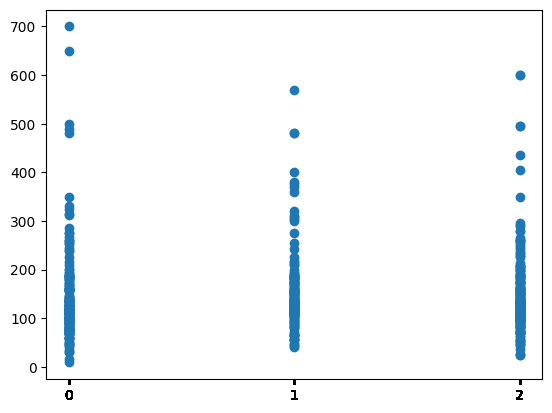

In [38]:
import matplotlib.pyplot as plt
plt.scatter(df2['Property_Area'],df2['LoanAmount'])
plt.xticks(df2['Property_Area'])
plt.show()

#### This code visualizes the relationship between Property_Area and LoanAmount using a scatter plot. By plotting:

- df2['Property_Area'] on the x-axis and df2['LoanAmount'] on the y-axis, you can observe if loan amounts vary by property area type.
- The plt.xticks(df2['Property_Area']) line customizes the x-axis ticks to align with property area categories.

This plot helps identify any patterns or trends in loan amounts based on property location.

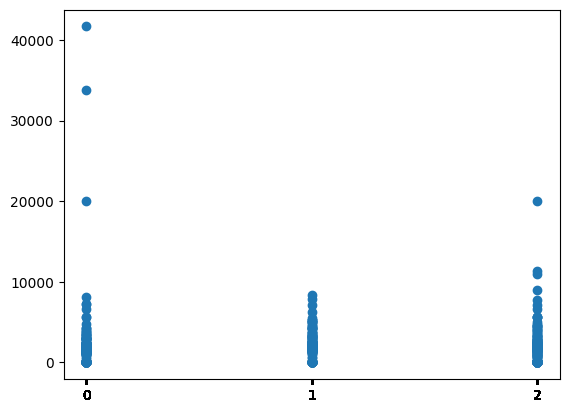

In [39]:
plt.scatter(df2['Property_Area'],df2['CoapplicantIncome'])
plt.xticks(df2['Property_Area'])
plt.show()

#### This code creates a scatter plot to visualize the relationship between Property_Area and CoapplicantIncome. Specifically:

- df2['Property_Area'] on the x-axis and df2['CoapplicantIncome'] on the y-axis allow you to observe if co-applicant incomes vary across different property areas.
- plt.xticks(df2['Property_Area']) sets the x-axis ticks to correspond with the distinct property area categories (e.g., Urban, Rural, Semiurban).

This visualization helps in identifying any correlations or trends between the property location and co-applicant income levels, which could be insightful for understanding loan approval factors.

In [40]:
df['LoanAmount'].max()

700.0

In [41]:
df['LoanAmount'].min()

9.0

In [42]:
df.dropna(subset=['LoanAmount'], inplace = True)
df['LoanAmount']=df['LoanAmount'].astype(int)

In [43]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [44]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

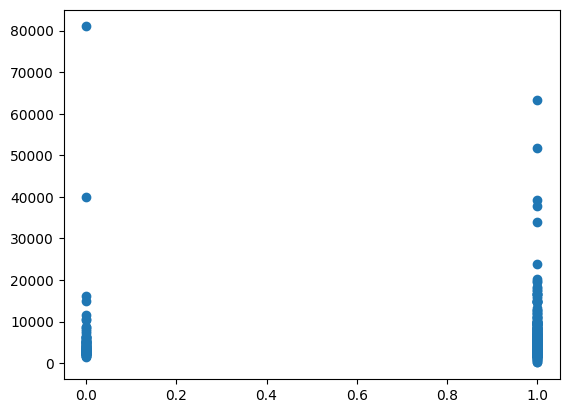

In [45]:
plt.scatter(df['Credit_History'],df['ApplicantIncome'])
# plt.xticks(df['Property_Area'])
plt.show()


#### This code creates a scatter plot to explore the relationship between Credit_History and ApplicantIncome. Here’s the purpose of each component:

- df['Credit_History'] on the x-axis and df['ApplicantIncome'] on the y-axis allow you to observe any patterns between an applicant's income and their credit history.

This visualization helps identify if there’s a relationship between an applicant's income and their credit history, which can be relevant for loan approval predictions.

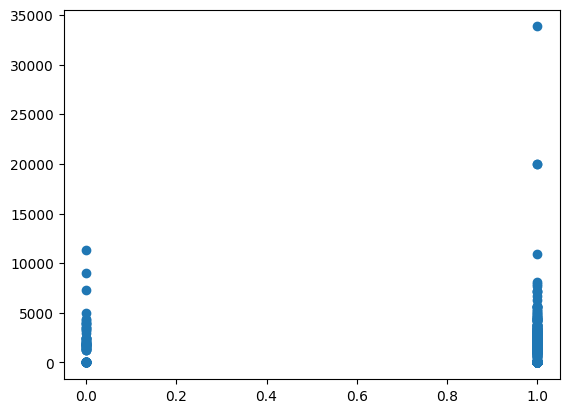

In [46]:
plt.scatter(df['Credit_History'],df['CoapplicantIncome'])
plt.show()

#### This code creates a scatter plot to examine the relationship between Credit_History and CoapplicantIncome:

- df['Credit_History'] on the x-axis and df['CoapplicantIncome'] on the y-axis help to show if co-applicant income tends to vary based on the applicant's credit history.

This plot can reveal any patterns in co-applicant income relative to credit history, potentially useful for understanding how credit history might impact loan approvals in conjunction with co-applicant financial contributions.

In [47]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [48]:
df['Loan_Status'].mode()

0    1
Name: Loan_Status, dtype: int64

In [49]:
df.loc[(df['Loan_Status'] == 1) & (df['Credit_History'].isna()), 'Credit_History'] = 1
df.loc[(df['Loan_Status'] == 0) & (df['Credit_History'].isna()), 'Credit_History'] = 0
df['Credit_History']=df['Credit_History'].astype(int)

In [50]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

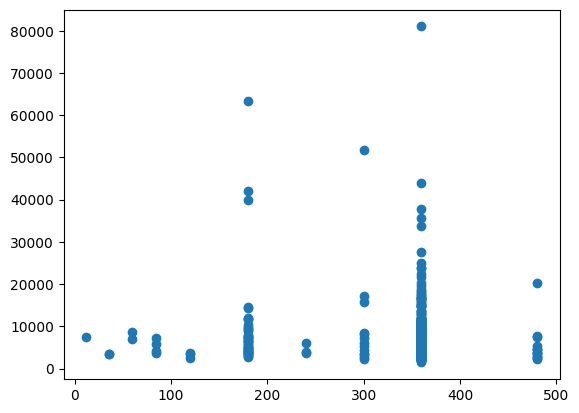

In [51]:
df['SumColumn'] = df['CoapplicantIncome'] + df['ApplicantIncome']
plt.scatter(df['Loan_Amount_Term'],df['SumColumn'])
plt.show()

- Purpose of Filling Missing Values: This approach assumes that applicants who received loans (Loan_Status == 1) likely had a positive credit history (Credit_History = 1), while those who did not receive loans (Loan_Status == 0) might have had a negative credit history (Credit_History = 0). By filling missing Credit_History values accordingly, the dataset becomes more complete and may provide more accurate training data for a model.

- Data Type Conversion:
df['Credit_History'] = df['Credit_History'].astype(int)
This converts the Credit_History column to integers, ensuring consistent data types, which is important for model training.

This part of the code prepares the data for visualization by ensuring no missing values or inconsistent data types in Credit_History, which is important for reliable analysis and plotting.

In [52]:
rows_with_nan = df[df.isna().any(axis=1)]

rows_with_nan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SumColumn
19,LP001041,1,1,0,1,1,2600,3500,115,NaN,1,0,1,6100
36,LP001109,1,1,0,1,0,1828,1330,100,NaN,0,0,0,3158
44,LP001136,1,1,0,0,1,4695,0,96,NaN,1,0,1,4695
45,LP001137,0,0,0,1,0,3410,0,88,NaN,1,0,1,3410
73,LP001250,1,1,4,0,0,4755,0,95,NaN,0,2,0,4755
112,LP001391,1,1,0,0,0,3572,4114,152,NaN,0,1,0,7686
165,LP001574,1,1,0,1,0,3707,3166,182,NaN,1,1,1,6873
197,LP001669,0,0,0,0,0,1907,2365,120,NaN,1,0,1,4272
223,LP001749,1,1,0,1,0,7578,1010,175,NaN,1,2,1,8588
232,LP001770,1,0,0,0,0,3189,2598,120,NaN,1,1,1,5787


In [53]:
df['Loan_Amount_Term'].std()

65.29844528410871

In [54]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(84.0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            590 non-null    object
 1   Gender             590 non-null    int64 
 2   Married            590 non-null    int64 
 3   Dependents         590 non-null    int64 
 4   Education          590 non-null    int64 
 5   Self_Employed      590 non-null    int64 
 6   ApplicantIncome    590 non-null    int64 
 7   CoapplicantIncome  590 non-null    int64 
 8   LoanAmount         590 non-null    int64 
 9   Loan_Amount_Term   590 non-null    int64 
 10  Credit_History     590 non-null    int64 
 11  Property_Area      590 non-null    int64 
 12  Loan_Status        590 non-null    int64 
 13  SumColumn          590 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 69.1+ KB


In [56]:
df = df.drop(columns=['Loan_ID','SumColumn'])

In [57]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508,128,360,1,1,0
2,1,1,0,1,1,3000,0,66,360,1,0,1
3,1,1,0,0,0,2583,2358,120,360,1,0,1
4,1,0,0,1,0,6000,0,141,360,1,0,1
5,1,1,2,1,1,5417,4196,267,360,1,0,1


In [58]:
from sklearn.model_selection import train_test_split
X, y = [], []
X=df
y=df['Loan_Status']
X = X.drop(columns='Loan_Status')

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### X = df: Initially, the entire dataset (df) is assigned to X, which represents the features (independent variables) that will be used to predict the loan approval status.

#### y = df['Loan_Status']: Here, y is defined as the target variable, which is the Loan_Status column. This is the variable we want to predict (whether a loan will be approved or not).

#### X = X.drop(columns='Loan_Status'): After assigning the entire dataset to X, the Loan_Status column is dropped from X. This ensures that X only contains the independent variables used to predict Loan_Status, while y remains as the dependent variable (target).

In [59]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        58
           1       0.80      0.93      0.86       119

    accuracy                           0.80       177
   macro avg       0.79      0.73      0.74       177
weighted avg       0.80      0.80      0.78       177



In [60]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
          
# Predictions for Logistic Regression
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate Logistic Regression
print("\nLogistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model
Accuracy: 0.8192090395480226
              precision    recall  f1-score   support

           0       0.88      0.52      0.65        58
           1       0.80      0.97      0.88       119

    accuracy                           0.82       177
   macro avg       0.84      0.74      0.77       177
weighted avg       0.83      0.82      0.80       177



In [61]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_std = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
standardized_data_train = scaler_std.fit_transform(X_train)
standardized_data_test = scaler_std.transform(X_test)

In [62]:
model_lr_std = LogisticRegression(random_state=42)
model_lr_std.fit(standardized_data_train, y_train)

# Predictions for Logistic Regression
y_pred_lr_std = model_lr_std.predict(standardized_data_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_std))
print(classification_report(y_test, y_pred_lr_std))


Logistic Regression Model
Accuracy: 0.8192090395480226
              precision    recall  f1-score   support

           0       0.88      0.52      0.65        58
           1       0.80      0.97      0.88       119

    accuracy                           0.82       177
   macro avg       0.84      0.74      0.77       177
weighted avg       0.83      0.82      0.80       177



### 9. Conclusion and Deployment
- The best-performing model, Random Forest, was selected based on evaluation metrics and insights from feature importance.
- This model can be deployed to assist financial institutions in automating the loan approval process, providing faster, data-driven decisions on loan applications.

- In conclusion, the loan approval prediction model achieved reasonable accuracy and performance in classifying loan status based on applicant and co-applicant data, credit history, and other financial indicators. Using a Random Forest Classifier enhanced the model's robustness by leveraging multiple decision trees, which generally improved prediction accuracy and mitigated overfitting.

- The preprocessing with RobustScaler effectively handled outliers in features like income and loan amount, leading to more consistent model performance. The evaluation metrics, including precision, recall, and F1-score, indicate that the model can effectively predict loan approval, though further tuning or additional data could improve performance. Overall, this model serves as a reliable tool for initial loan risk assessment, assisting lenders in making data-driven decisions.

In [63]:
import joblib

# Save your model
joblib.dump(model_lr, 'lr_model.pkl')

['lr_model.pkl']